<a href="https://colab.research.google.com/github/CardosoJr/bootcamp/blob/main/Labs/Lab_17_Intro_to_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab -  Intro to Natural Language Processing

## Sequence Models

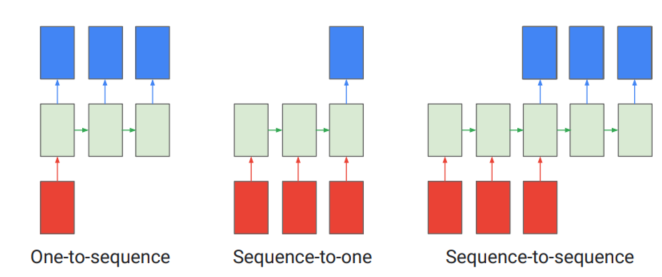

### Recurrent Neural Networks 

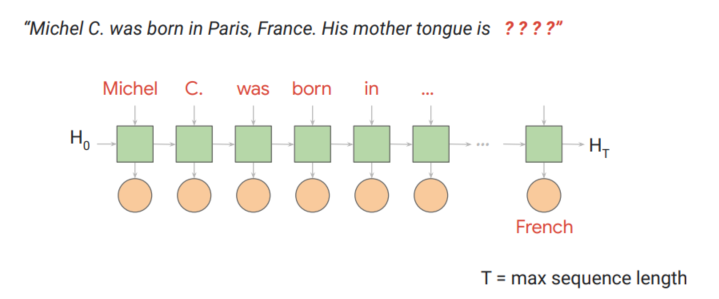

## Aplicações em NLP 

In [ ]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd 
import numpy as np

In [ ]:
!pip install -q -U spacy

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4') 
nltk.download('punkt') 
nltk.download('tagsets')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

### Pré-processamentos

#### Stop Words

In [ ]:
spacy_stop_words = sorted(list(nlp.Defaults.stop_words))#[:20]
spacy_stop_words[:20]

["'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also']

#### Tokenization 

In [ ]:
my_string = "I am learning Natural Language Processing."

In [ ]:
nltk.word_tokenize(my_string)

['I', 'am', 'learning', 'Natural', 'Language', 'Processing', '.']

In [ ]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
remove = ('headers', 'footers', 'quotes')
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=remove)

In [ ]:
newsgroups_train.filenames.shape

(2034,)

In [ ]:
print(newsgroups_train.data[0],)

Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych


In [ ]:
nltk.word_tokenize(newsgroups_train.data[0])[:15]

['Hi',
 ',',
 'I',
 "'ve",
 'noticed',
 'that',
 'if',
 'you',
 'only',
 'save',
 'a',
 'model',
 '(',
 'with',
 'all']

In [ ]:
nltk.sent_tokenize(newsgroups_train.data[0])


["Hi,\n\nI've noticed that if you only save a model (with all your mapping planes\npositioned carefully) to a .3DS file that when you reload it after restarting\n3DS, they are given a default position and orientation.",
 'But if you save\nto a .PRJ file their positions/orientation are preserved.',
 'Does anyone\nknow why this information is not stored in the .3DS file?',
 'Nothing is\nexplicitly said in the manual about saving texture rules in the .PRJ file.',
 "I'd like to be able to read the texture rule information, does anyone have \nthe format for the .PRJ file?",
 'Is the .CEL file format available from somewhere?',
 'Rych']

#### Lemmatization

In [ ]:
from nltk import stem

wnl = stem.WordNetLemmatizer()
porter = stem.porter.PorterStemmer()

In [ ]:
my_list = ["cat","cats","lie","lying","run","running","city","cities","month","monthly","woman","women",'feet', 'foot', 'foots', 'footing']
for word in my_list:
    print(porter.stem(word))

cat
cat
lie
lie
run
run
citi
citi
month
monthli
woman
women
feet
foot
foot
foot


In [ ]:
for word in my_list:
    print(wnl.lemmatize(word))

cat
cat
lie
lying
run
running
city
city
month
monthly
woman
woman
foot
foot
foot
footing


In [ ]:
[wnl.lemmatize(x) for x in nltk.word_tokenize(newsgroups_train.data[0])][:15]

['Hi',
 ',',
 'I',
 "'ve",
 'noticed',
 'that',
 'if',
 'you',
 'only',
 'save',
 'a',
 'model',
 '(',
 'with',
 'all']

#### Tagging

 https://en.wikipedia.org/w/index.php?title=Brown_Corpus

In [ ]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [ ]:
text = "I walked to the cafe to buy coffee before work."
tokens = nltk.word_tokenize(text)
nltk.pos_tag(tokens)

[('I', 'PRP'),
 ('walked', 'VBD'),
 ('to', 'TO'),
 ('the', 'DT'),
 ('cafe', 'NN'),
 ('to', 'TO'),
 ('buy', 'VB'),
 ('coffee', 'NN'),
 ('before', 'IN'),
 ('work', 'NN'),
 ('.', '.')]

#### Entity Recognition

In [ ]:
text = """
The FIFA World Cup, often simply called the World Cup, is an international association football competition contested by the senior men's national teams of the members of the Fédération Internationale de Football Association (FIFA), the sport's global governing body. The championship has been awarded every four years since the inaugural tournament in 1930, except in 1942 and 1946 when it was not held because of the Second World War. The current champions are France, who won their second title at the 2018 tournament in Russia.

The current format involves a qualification phase, which takes place over the preceding three years, to determine which teams qualify for the tournament phase. In the tournament phase, 32 teams compete for the title at venues within the host nation(s) over about a month. The host nation(s) automatically qualify.

As of the 2018 FIFA World Cup, twenty-one final tournaments have been held and a total of 79 national teams have competed. The trophy has been won by eight national teams. Brazil have won five times, and they are the only team to have played in every tournament. The other World Cup winners are Germany and Italy, with four titles each; Argentina, France, and inaugural winner Uruguay, with two titles each; and England and Spain, with one title each.

The World Cup is the most prestigious association football tournament in the world, as well as the most widely viewed and followed single sporting event in the world. The cumulative viewership of all matches of the 2006 World Cup was estimated to be 26.29 billion with an estimated 715.1 million people watching the final match, a ninth of the entire population of the planet.[1][2][3][4]

17 countries have hosted the World Cup. Brazil, France, Italy, Germany, and Mexico have each hosted twice, while Uruguay, Switzerland, Sweden, Chile, England, Argentina, Spain, the United States, Japan and South Korea (jointly), South Africa, and Russia have each hosted once. Qatar is hosting the 2022 tournament, and 2026 will be jointly hosted by Canada, the United States, and Mexico, which will give Mexico the distinction of being the first country to host games in three World Cups.
"""
text_tag = nltk.pos_tag(nltk.word_tokenize(text))
text_ch = nltk.ne_chunk(text_tag)
for chunk in text_ch:
    if hasattr(chunk, 'label'):
        print(chunk.label(), ' '.join(c[0] for c in chunk.leaves()))

ORGANIZATION FIFA
ORGANIZATION Fédération Internationale
ORGANIZATION FIFA
ORGANIZATION Second
GPE France
GPE Russia
ORGANIZATION FIFA
PERSON Brazil
GPE Germany
GPE Italy
GPE Argentina
GPE France
PERSON Uruguay
GPE England
GPE Spain
PERSON Brazil
GPE France
GPE Italy
GPE Germany
GPE Mexico
GPE Uruguay
GPE Switzerland
GPE Sweden
GPE Chile
GPE England
GPE Argentina
GPE Spain
GPE United States
GPE Japan
GPE South Korea
GPE South Africa
GPE Russia
PERSON Qatar
GPE Canada
GPE United States
GPE Mexico
GPE Mexico


### TF-IDF

$TF = t/n$

- t = número de vezes que aparece a palavra no texto
- n = número de palavras no texto

$IDF = \log_{10} D / d$


- D = número de textos
- d = número de textos que têm a palavra

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vectorizer = CountVectorizer(stop_words='english')


In [ ]:
vectors = vectorizer.fit_transform(newsgroups_train.data[:10]).todense() # (documents, vocab)
vectors.shape #, vectors.nnz / vectors.shape[0], row_means.shape

(10, 367)

In [ ]:
vocab = np.array(vectorizer.get_feature_names())
vocab.shape

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(367,)

In [ ]:
pd.DataFrame(np.round(vectors,3), columns=vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,020359,16,18,1850,1970,1993,1993apr19,20,25mhz,26996,...,ve,virginia,wales,want,wars,weak,white,wingate,working,wouldn
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,5,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
7,0,1,1,0,0,0,0,2,2,0,...,0,0,0,0,0,0,0,0,1,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
count_tf_idf = TfidfVectorizer(stop_words='english')
tf_idf = count_tf_idf.fit_transform(newsgroups_train.data[:10])

In [ ]:
pd.DataFrame(np.round(tf_idf.A,3), columns=count_tf_idf.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,020359,16,18,1850,1970,1993,1993apr19,20,25mhz,26996,...,ve,virginia,wales,want,wars,weak,white,wingate,working,wouldn
0,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,...,0.084,0.000,0.0,0.000,0.00,0.00,0.000,0.000,0.000,0.000
1,0.000,0.000,0.000,0.0,0.000,0.188,0.000,0.000,0.000,0.000,...,0.000,0.000,0.0,0.000,0.00,0.00,0.000,0.000,0.000,0.000
2,0.149,0.000,0.000,0.0,0.149,0.000,0.149,0.000,0.000,0.149,...,0.000,0.000,0.0,0.000,0.00,0.00,0.000,0.000,0.000,0.000
3,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.0,0.066,0.00,0.00,0.000,0.389,0.000,0.078
4,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.246,0.0,0.209,0.00,0.00,0.000,0.000,0.000,0.000
5,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.0,0.000,0.12,0.12,0.000,0.000,0.000,0.000
6,0.000,0.000,0.000,0.1,0.000,0.000,0.000,0.000,0.000,0.000,...,0.085,0.000,0.1,0.000,0.00,0.00,0.000,0.000,0.000,0.000
7,0.000,0.085,0.085,0.0,0.000,0.000,0.000,0.169,0.169,0.000,...,0.000,0.000,0.0,0.000,0.00,0.00,0.000,0.000,0.085,0.000
8,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.0,0.000,0.00,0.00,0.000,0.000,0.000,0.000
9,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.0,0.000,0.00,0.00,0.158,0.000,0.000,0.000


In [ ]:
num_top_words=8

def show_topics(a):
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    topic_words = ([top_words(t) for t in a])
    return [' '.join(t) for t in topic_words]

#### Apllicando um factorização de matrizes 

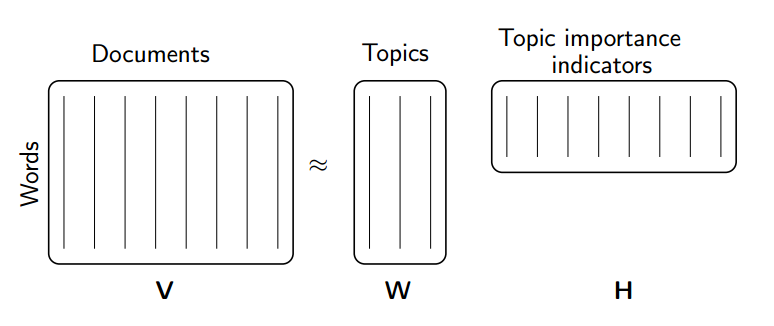

In [ ]:
vectors = vectorizer.fit_transform(newsgroups_train.data).todense()
vocab = np.array(vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
vectors.shape, vocab.shape

((2034, 26576), (26576,))

In [ ]:
m,n=vectors.shape
d=5  # num topics

In [ ]:
from sklearn import decomposition
clf = decomposition.NMF(n_components=d, random_state=1)

W1 = clf.fit_transform(vectors)
H1 = clf.components_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


In [ ]:
H1.shape, W1.shape

((5, 26576), (2034, 5))

In [ ]:
W1

array([[0.08858936, 0.02984714, 0.        , 0.04220515, 0.        ],
       [0.        , 0.00074146, 0.0037713 , 0.02133068, 0.00096886],
       [0.        , 0.01650813, 0.00026615, 0.02582674, 0.00294897],
       ...,
       [0.00897787, 0.03011237, 0.0033981 , 0.01453643, 0.00331353],
       [0.01862327, 0.        , 0.00123129, 0.21812662, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])

In [ ]:
show_topics(H1)

['jpeg image gif file color images format quality',
 'edu graphics pub mail 128 ray ftp send',
 'space launch satellite nasa commercial satellites year market',
 'jesus god people matthew atheists does atheism said',
 'image data available software processing ftp edu analysis']

#### Aplicando em modelagem

https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews?resource=download

In [ ]:
from bs4 import BeautifulSoup
import re

In [ ]:
df = pd.read_csv('IMDB Dataset.csv')

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
    
df['review']=df['review'].apply(denoise_text)
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
df['review']=df['review'].apply(remove_special_characters)

In [ ]:
#Lemmatizing the text
def simple_lem(text):
    wnl = stem.WordNetLemmatizer()
    text= ' '.join([wnl.lemmatize(word) for word in text.split()])
    return text
df['review']=df['review'].apply(simple_lem)

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewer ha mentioned that af...,positive
1,A wonderful little production The filming tech...,positive
2,I thought this wa a wonderful way to spend tim...,positive
3,Basically there a family where a little boy Ja...,negative
4,Petter Matteis Love in the Time of Money is a ...,positive


In [ ]:
from nltk.tokenize.toktok import ToktokTokenizer

tokenizer=ToktokTokenizer()

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in spacy_stop_words]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in spacy_stop_words]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
df['review']=df['review'].apply(remove_stopwords)

In [ ]:
df.head()

,review,sentiment
0,reviewer ha mentioned watching 1 Oz episode yo...,positive
1,wonderful little production filming technique ...,positive
2,thought wa wonderful way spend time hot summer...,positive
3,Basically family little boy Jake think zombie ...,negative
4,Petter Matteis Love Time Money visually stunni...,positive


In [ ]:
from sklearn.model_selection import train_test_split

df['sentiment'] = df['sentiment'].map({'negative' : 0, 'positive' : 1})

X_train, X_test = train_test_split(df, test_size = 0.3)
y_train = X_train.pop('sentiment')
y_test = X_test.pop('sentiment')

In [ ]:
count_tf_idf = TfidfVectorizer()
train_tf_idf = count_tf_idf.fit_transform(X_train["review"])
test_tf_idf = count_tf_idf.transform(X_test["review"])

In [ ]:
train_tf_idf

<35000x171506 sparse matrix of type '<class 'numpy.float64'>'
	with 3037868 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
lr_bow=lr.fit(train_tf_idf,y_train)
print(lr_bow)

LogisticRegression(C=1, max_iter=500, random_state=42)


In [ ]:
accuracy_score(y_test, lr.predict(test_tf_idf) )

0.8837333333333334

### Word Embeddings

* https://projector.tensorflow.org/

### Text Similarity